In [1]:
# Analyze the following earnings call transcript for potential deceptive language patterns by the CEO and CFO. Specifically examine:

# 1. References and Pronouns:
# - Usage of first-person singular pronouns (I, me, mine)
# - Usage of first-person plural pronouns (we, us, our)
# - Usage of third-person pronouns (they, them)
# - Usage of impersonal pronouns
# - References to general knowledge (e.g., "you know", "everybody knows")

# 2. Emotional Language:
# - Non-extreme positive emotions
# - Extreme positive emotions (e.g., "fantastic", "amazing", "incredible")
# - Negative emotions and anxiety words
# - Use of negations (no, not, never)

# 3. Other Key Indicators:
# - Certainty vs tentative language
# - References to shareholder value
# - Length and complexity of responses
# - Hesitations in speech

# Please analyze these patterns separately for the CEO and CFO portions of the transcript and note any concerning combinations of linguistic patterns based on research findings.

# [Insert earnings call transcript here]

In [2]:
# Conduct a detailed linguistic analysis of this earnings call transcript focusing on known deceptive language patterns. For both the CEO and CFO sections:

# 1. CEO-Specific Red Flags:
# - Excessive use of extreme positive emotion words
# - Decreased use of anxiety words
# - High usage of general knowledge references
# - Reduced references to shareholder value
# - Analyze the ratio of extreme positive to neutral/negative language

# 2. CFO-Specific Red Flags:
# - Increased use of negation words
# - Length of responses (longer responses can indicate deception)
# - Reduced use of first-person singular pronouns
# - Increased use of extreme negative emotions
# - Higher frequency of swear words or unprofessional language
# - Usage of tentative vs certainty words

# 3. Compare Against Baseline:
# - Note significant deviations from typical executive communication patterns
# - Identify clusters of deceptive indicators
# - Analyze response patterns to challenging questions

# Please provide:
# - Quantitative analysis where possible (word frequencies, ratios)
# - Specific examples from the transcript
# - Overall risk assessment based on linguistic patterns
# - Separate analyses for prepared remarks vs Q&A sections

# [Insert earnings call transcript here]

In [3]:
# Perform a comprehensive analysis of this earnings call transcript considering both linguistic patterns and contextual elements that may indicate deceptive communication:

# 1. Narrative Flow Analysis:
# - Changes in linguistic patterns when discussing financial metrics
# - Shifts in language when addressing challenging questions
# - Consistency of communication style throughout the call

# 2. Executive-Specific Patterns:
# For CEO:
# - Track use of extreme positive language vs concrete operational details
# - Monitor anxiety word suppression
# - Analyze reference patterns to general knowledge

# For CFO:
# - Evaluate complexity and length of financial explanations
# - Track self-reference patterns
# - Monitor negation frequency and context

# 3. Question & Answer Dynamics:
# - Language changes between prepared remarks and Q&A
# - Response patterns to analyst questions about:
#   * Financial performance
#   * Risk factors
#   * Future projections
#   * Operational challenges

# 4. Contextual Factors:
# - Industry-specific terminology usage
# - Market conditions references
# - Competitive landscape discussions
# - Historical performance comparisons

# Please provide:
# - Detailed pattern analysis
# - Specific examples of concerning language
# - Comparison to typical executive communication patterns
# - Overall risk assessment

# [Insert earnings call transcript here]

In [4]:
!pip install --upgrade nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.7 MB/s eta 0:00:0000:0100:010m
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [5]:
!rm -rf /root/nltk_data/tokenizers/punkt

In [6]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/kellygong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/kellygong/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kellygong/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kellygong/nltk_data...


True

In [7]:
def tokenize(token):
    return nltk.word_tokenize(token)
tokenize("This is a test sentence.")

['This', 'is', 'a', 'test', 'sentence', '.']

In [8]:
import pandas as pd
import numpy as np
from nltk import word_tokenize, sent_tokenize
import nltk
from collections import Counter
import yfinance as yf
from datetime import datetime, timedelta
import re

/Users/kellygong/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [9]:
def initialize_word_categories():
    """Initialize word categories based on the paper's specific findings and additional terms."""
    categories = {
        'first_person_singular': {'I', 'me', 'mine', 'my'},
        'first_person_plural': {'we', 'us', 'our', 'ours'},
        'third_person_plural': {'they', 'them', 'their', 'theirs'},
        'impersonal_pronouns': {'it', 'this', 'that', 'these', 'those'},
        'general_knowledge': {
            'you know', 'everybody knows', 'everyone knows', 'others know',
            'investors know', 'shareholders know', 'revenue', 'profit', 'cash flow',
            'growth', 'margin', 'debt', 'expansion', 'earnings', 'market share'
        },
        'extreme_positive': {
            'fantastic', 'great', 'definitely', 'amazing', 'excellent',
            'extraordinary', 'incredible', 'tremendous', 'phenomenal', 'unbelievable'
        },
        'non_extreme_positive': {
            'good', 'positive', 'nice', 'pleasant', 'favorable',
            'satisfactory', 'adequate', 'acceptable', 'impressive'
        },
        'extreme_negative': {
            'terrible', 'horrible', 'awful', 'dreadful', 'devastating',
            'catastrophic', 'disastrous', 'unfortunate', 'tragic'
        },
        'non_extreme_negative': {
            'unpleasant', 'problematic', 'disappointing', 'unfortunate'
        },
        'anxiety': {'worried', 'fearful', 'nervous', 'anxious', 'concerned',
                    'uncertainty', 'risk', 'afraid', 'worry', 'stressful'},
        'hesitation': {'uh', 'um', 'you know', 'I think', 'I believe',
                       'it seems', 'maybe', 'possibly', 'not sure', 'could', 'might'},
        'certainty': {'absolutely', 'certainly', 'definitely', 'undoubtedly', 'without a doubt'},
        'tentative': {'somewhat', 'quite', 'rather', 'perhaps', 'roughly', 'potentially'},
        'qualifiers': {'particularly', 'specifically', 'exactly', 'mainly', 'generally', 'more or less'},
        'negation': {'no', 'not', 'never', 'none', 'neither', 'nor'},
        'shareholder_value': {'shareholder value', 'shareholder welfare', 'value for shareholders', 'investor value'}
    }
    return categories

In [10]:
def analyze_transcript(text, categories):
    """Analyze transcript text for word frequencies in specified categories."""
    # Preprocess text
    text = text.lower()
    words = word_tokenize(re.sub(r'[^\w\s]', '', text))  # Remove punctuation
    word_count = len(words)

    # Handle multi-word phrases
    text_str = ' '.join(words)

    frequencies = {}
    for category, word_set in categories.items():
        # Match words in the category
        single_word_matches = sum(1 for word in words if word in word_set)
        multi_word_matches = sum(len(re.findall(r'\b' + re.escape(phrase) + r'\b', text_str)) for phrase in word_set)

        count = single_word_matches + multi_word_matches
        frequencies[category] = count / word_count if word_count > 0 else 0

    return frequencies


In [11]:
def calculate_deception_score(frequencies, role):
    """Calculate deception score based on the paper's findings in Table 6 NT category"""
    score = 0

    if role == 'CEO':
        # CEO-specific weights based on paper's findings
        weights = {
            'general_knowledge': 1.91,
            'non_extreme_positive': -0.88,
            # 'extreme_positive': 1.20,
            'anxiety': -0.38,
            'shareholder_value': -0.91
        }
    else:  # CFO
        # CFO-specific weights based on paper's findings
        weights = {
            'general_knowledge': 2.05,
            'first_person_singular': -0.80,
            'impersonal_pronouns': -0.93,
            'negation': 1.23,
            'non_extreme_positive': -0.83,
            # 'extreme_negative': 1.37,
            'shareholder_value': -0.76
        }

    for category, weight in weights.items():
        if category in frequencies:
            score += frequencies[category] * weight

    return score


In [12]:
def separate_qa_from_md(transcript):
    """Separate Management Discussion (MD) and Q&A sections in the transcript."""
    # Define the pattern to identify the start of the Q&A section
    qa_pattern = r"Question-and-Answer Session:?"

    # Search for the start of the Q&A section
    match = re.search(qa_pattern, transcript)

    if match:
        # Split the transcript into MD and Q&A based on the match
        md = transcript[:match.start()].strip()  # Text before 'Question-and-Answer Session:'
        qa = transcript[match.end():].strip()   # Text after 'Question-and-Answer Session:'
    else:
        # If 'Question-and-Answer Session' not found, treat the whole text as MD
        md = transcript.strip()
        qa = ""  # No Q&A section

    return {
        'md': md,
        'qa': qa
    }

In [13]:
def get_stock_performance(ticker, call_date):
    """Get stock performance metrics around earnings call."""
    try:
        stock = yf.Ticker(ticker)

        # Get data for 3 months after call (paper found significant returns in this period)
        start_date = pd.to_datetime(call_date)
        end_date = start_date + pd.DateOffset(months=3)

        hist = stock.history(start=start_date, end=end_date)

        if not hist.empty:
            initial_price = hist.iloc[0]['Close']
            final_price = hist.iloc[-1]['Close']
            return (final_price - initial_price) / initial_price

        return None
    except Exception as e:
        print(f"Error getting stock data: {e}")
        return None

In [14]:
def generate_analysis_report(analysis_results):
    """Generate detailed report based on analysis results."""
    report = []
    report.append("=== Earnings Call Deception Analysis Report ===\n")

    # CEO Analysis
    report.append("CEO Analysis:")
    report.append(f"Deception Score: {analysis_results['ceo_analysis']['deception_score']:.3f}")
    report.append("\nKey Language Patterns:")
    for category, freq in analysis_results['ceo_analysis']['frequencies'].items():
        report.append(f"{category.replace('_', ' ').title()}: {freq:.4f}")

    # CFO Analysis
    report.append("\nCFO Analysis:")
    report.append(f"Deception Score: {analysis_results['cfo_analysis']['deception_score']:.3f}")
    report.append("\nKey Language Patterns:")
    for category, freq in analysis_results['cfo_analysis']['frequencies'].items():
        report.append(f"{category.replace('_', ' ').title()}: {freq:.4f}")

    # Stock Performance
    if analysis_results['stock_performance'] is not None:
        report.append(f"\nThree-Month Stock Return: {analysis_results['stock_performance']:.2%}")

    return "\n".join(report)


### NVDA FY 2025 Q2

In [15]:
# Test function usage
transcript_path = "NVDA.txt"  # Path to your transcript file
with open(transcript_path, 'r', encoding='utf-8') as file:
    sample_transcript = file.read()

# Initialize categories
categories = initialize_word_categories()

# Separate the Management Discussion and Q&A sections
sections = separate_qa_from_md(sample_transcript)

# Analyze CEO and CFO language patterns
ceo_frequencies = analyze_transcript(sections['md'], categories)
cfo_frequencies = analyze_transcript(sections['qa'], categories)

# Calculate deception scores
ceo_score = calculate_deception_score(ceo_frequencies, 'CEO')
cfo_score = calculate_deception_score(cfo_frequencies, 'CFO')

# Get stock performance
ticker = "NVDA"
call_date = "2024-08-28"
stock_perf = get_stock_performance(ticker, call_date)

# Compile results into a report
analysis_results = {
    'ceo_analysis': {'frequencies': ceo_frequencies, 'deception_score': ceo_score},
    'cfo_analysis': {'frequencies': cfo_frequencies, 'deception_score': cfo_score},
    'stock_performance': stock_perf
}

# Generate and print the report
print(generate_analysis_report(analysis_results))

=== Earnings Call Deception Analysis Report ===

CEO Analysis:
Deception Score: 0.053

Key Language Patterns:
First Person Singular: 0.0040
First Person Plural: 0.0489
Third Person Plural: 0.0096
Impersonal Pronouns: 0.0160
General Knowledge: 0.0285
Extreme Positive: 0.0024
Non Extreme Positive: 0.0016
Extreme Negative: 0.0000
Non Extreme Negative: 0.0000
Anxiety: 0.0000
Hesitation: 0.0008
Certainty: 0.0000
Tentative: 0.0008
Qualifiers: 0.0000
Negation: 0.0016
Shareholder Value: 0.0000

CFO Analysis:
Deception Score: -0.051

Key Language Patterns:
First Person Singular: 0.0022
First Person Plural: 0.0498
Third Person Plural: 0.0146
Impersonal Pronouns: 0.0755
General Knowledge: 0.0067
Extreme Positive: 0.0025
Non Extreme Positive: 0.0016
Extreme Negative: 0.0000
Non Extreme Negative: 0.0000
Anxiety: 0.0003
Hesitation: 0.0071
Certainty: 0.0003
Tentative: 0.0041
Qualifiers: 0.0006
Negation: 0.0067
Shareholder Value: 0.0000

Three-Month Stock Return: 7.76%


### SMCI FY 2024 Q1


In [16]:
# Test function usage
transcript_path = "SMCI.txt"  # Path to your transcript file
with open(transcript_path, 'r', encoding='utf-8') as file:
    sample_transcript = file.read()

# Initialize categories
categories = initialize_word_categories()

# Separate the Management Discussion and Q&A sections
sections = separate_qa_from_md(sample_transcript)

# Analyze CEO and CFO language patterns
ceo_frequencies = analyze_transcript(sections['md'], categories)
cfo_frequencies = analyze_transcript(sections['qa'], categories)

# Calculate deception scores
ceo_score = calculate_deception_score(ceo_frequencies, 'CEO')
cfo_score = calculate_deception_score(cfo_frequencies, 'CFO')

# Get stock performance
ticker = "SMCI"
call_date = "2023-11-01"
stock_perf = get_stock_performance(ticker, call_date)

# Compile results into a report
analysis_results = {
    'ceo_analysis': {'frequencies': ceo_frequencies, 'deception_score': ceo_score},
    'cfo_analysis': {'frequencies': cfo_frequencies, 'deception_score': cfo_score},
    'stock_performance': stock_perf
}

# Generate and print the report
print(generate_analysis_report(analysis_results))

=== Earnings Call Deception Analysis Report ===

CEO Analysis:
Deception Score: 0.028

Key Language Patterns:
First Person Singular: 0.0021
First Person Plural: 0.0761
Third Person Plural: 0.0035
Impersonal Pronouns: 0.0244
General Knowledge: 0.0161
Extreme Positive: 0.0000
Non Extreme Positive: 0.0028
Extreme Negative: 0.0000
Non Extreme Negative: 0.0000
Anxiety: 0.0007
Hesitation: 0.0014
Certainty: 0.0000
Tentative: 0.0000
Qualifiers: 0.0000
Negation: 0.0021
Shareholder Value: 0.0000

CFO Analysis:
Deception Score: -0.008

Key Language Patterns:
First Person Singular: 0.0018
First Person Plural: 0.0964
Third Person Plural: 0.0046
Impersonal Pronouns: 0.0606
General Knowledge: 0.0243
Extreme Positive: 0.0009
Non Extreme Positive: 0.0037
Extreme Negative: 0.0000
Non Extreme Negative: 0.0000
Anxiety: 0.0000
Hesitation: 0.0106
Certainty: 0.0000
Tentative: 0.0009
Qualifiers: 0.0009
Negation: 0.0028
Shareholder Value: 0.0000

Three-Month Stock Return: 109.94%


### SBUX FY 2024 Q2

In [17]:
def separate_qa_from_md(transcript):
    """Separate Management Discussion (MD) and Q&A sections in the transcript."""
    # Define the pattern to identify the start of the Q&A section
    qa_pattern = r"Questions & Answers:?"

    # Search for the start of the Q&A section
    match = re.search(qa_pattern, transcript)

    if match:
        # Split the transcript into MD and Q&A based on the match
        md = transcript[:match.start()].strip()  # Text before 'Questions & Answers:'
        qa = transcript[match.end():].strip()   # Text after 'Questions & Answers:'
    else:
        # If 'Questions & Answers:' not found, treat the whole text as MD
        md = transcript.strip()
        qa = ""  # No Q&A section

    return {
        'md': md,
        'qa': qa
    }


In [18]:
# Test function usage
transcript_path = "SBUX.txt"  # Path to your transcript file
with open(transcript_path, 'r', encoding='utf-8') as file:
    sample_transcript = file.read()

# Initialize categories
categories = initialize_word_categories()

# Separate the Management Discussion and Q&A sections
sections = separate_qa_from_md(sample_transcript)

# Analyze CEO and CFO language patterns
ceo_frequencies = analyze_transcript(sections['md'], categories)
cfo_frequencies = analyze_transcript(sections['qa'], categories)

# Calculate deception scores
ceo_score = calculate_deception_score(ceo_frequencies, 'CEO')
cfo_score = calculate_deception_score(cfo_frequencies, 'CFO')

# Get stock performance
ticker = "SBUX"
call_date = "2024-04-30"
stock_perf = get_stock_performance(ticker, call_date)

# Compile results into a report
analysis_results = {
    'ceo_analysis': {'frequencies': ceo_frequencies, 'deception_score': ceo_score},
    'cfo_analysis': {'frequencies': cfo_frequencies, 'deception_score': cfo_score},
    'stock_performance': stock_perf
}

# Generate and print the report
print(generate_analysis_report(analysis_results))

=== Earnings Call Deception Analysis Report ===

CEO Analysis:
Deception Score: 0.045

Key Language Patterns:
First Person Singular: 0.0030
First Person Plural: 0.1444
Third Person Plural: 0.0068
Impersonal Pronouns: 0.0333
General Knowledge: 0.0241
Extreme Positive: 0.0024
Non Extreme Positive: 0.0015
Extreme Negative: 0.0000
Non Extreme Negative: 0.0003
Anxiety: 0.0003
Hesitation: 0.0003
Certainty: 0.0000
Tentative: 0.0006
Qualifiers: 0.0021
Negation: 0.0039
Shareholder Value: 0.0000

CFO Analysis:
Deception Score: -0.064

Key Language Patterns:
First Person Singular: 0.0041
First Person Plural: 0.0852
Third Person Plural: 0.0133
Impersonal Pronouns: 0.0907
General Knowledge: 0.0085
Extreme Positive: 0.0027
Non Extreme Positive: 0.0027
Extreme Negative: 0.0000
Non Extreme Negative: 0.0000
Anxiety: 0.0005
Hesitation: 0.0069
Certainty: 0.0005
Tentative: 0.0018
Qualifiers: 0.0060
Negation: 0.0073
Shareholder Value: 0.0000

Three-Month Stock Return: -14.37%


### Summary

In [19]:
import pandas as pd

# Data
data = {
    "Company": ["NVDA FY 2025 Q4", "SMCI FY 2024 Q1", "SBUX FY 2024 Q2"],
    "CEO_Score": [0.053, 0.028, 0.045],
    "CFO_Score": [-0.051, -0.008, -0.064],
    "Stock_Return (%)": [13.04, 109.94, -14.37]
}

# Create DataFrame
df = pd.DataFrame(data)
df

,Company,CEO_Score,CFO_Score,Stock_Return (%)
0,NVDA FY 2025 Q4,0.053,-0.051,13.04
1,SMCI FY 2024 Q1,0.028,-0.008,109.94
2,SBUX FY 2024 Q2,0.045,-0.064,-14.37


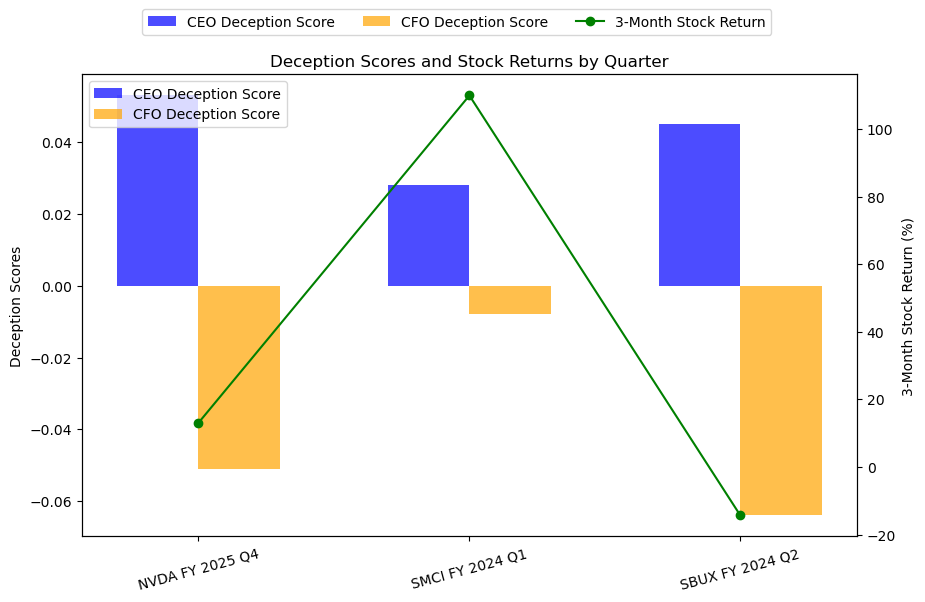

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
companies = ["NVDA FY 2025 Q4", "SMCI FY 2024 Q1", "SBUX FY 2024 Q2"]
ceo_scores = [0.053, 0.028, 0.045]
cfo_scores = [-0.051, -0.008, -0.064]
stock_returns = [13.04, 109.94, -14.37]

x = np.arange(len(companies))  # the label locations
width = 0.3  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for deception scores (left y-axis)
bar1 = ax1.bar(x - width/2, ceo_scores, width, label='CEO Deception Score', color='blue', alpha=0.7)
bar2 = ax1.bar(x + width/2, cfo_scores, width, label='CFO Deception Score', color='orange', alpha=0.7)
ax1.set_ylabel('Deception Scores')
ax1.set_xticks(x)
ax1.set_xticklabels(companies, rotation=15)
ax1.legend(loc='upper left')

# Line plot for stock returns (right y-axis)
ax2 = ax1.twinx()
line, = ax2.plot(x, stock_returns, color='green', marker='o', label='3-Month Stock Return')
ax2.set_ylabel('3-Month Stock Return (%)')

# Title and layout
plt.title('Deception Scores and Stock Returns by Quarter')
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3)

plt.show()


### DeceptiveLanguageDetector

In [21]:
import pandas as pd
import numpy as np
from nltk import word_tokenize, sent_tokenize
import nltk
from collections import Counter
import yfinance as yf
from datetime import datetime, timedelta
import re

class DeceptiveLanguageDetector:
    def __init__(self):
        nltk.download('punkt')
        self.initialize_word_categories()

    def initialize_word_categories(self):
        """Initialize word categories based on the paper's specific findings and additional terms"""
        self.categories = {
            # Pronouns
            'first_person_singular': {'I', 'me', 'mine', 'my'},
            'first_person_plural': {'we', 'us', 'our', 'ours'},
            'third_person_plural': {'they', 'them', 'their', 'theirs'},
            'impersonal_pronouns': {'it', 'this', 'that', 'these', 'those'},

            # General knowledge references
            'general_knowledge': {
                'you know', 'everybody knows', 'everyone knows', 'others know',
                'investors know', 'shareholders know', 'revenue', 'profit', 'cash flow',
                'growth', 'margin', 'debt', 'expansion', 'earnings', 'market share'
            },

            # Emotional language
            'extreme_positive': {
                'fantastic', 'great', 'definitely', 'amazing', 'excellent',
                'extraordinary', 'incredible', 'tremendous', 'phenomenal', 'unbelievable'
            },
            'non_extreme_positive': {
                'good', 'positive', 'nice', 'pleasant', 'favorable',
                'satisfactory', 'adequate', 'acceptable', 'impressive'
            },
            'extreme_negative': {
                'terrible', 'horrible', 'awful', 'dreadful', 'devastating',
                'catastrophic', 'disastrous', 'unfortunate', 'tragic'
            },
            'non_extreme_negative': {
                'unpleasant', 'problematic', 'disappointing', 'unfortunate'
            },

            # Anxiety words
            'anxiety': {'worried', 'fearful', 'nervous', 'anxious', 'concerned',
                        'uncertainty', 'risk', 'afraid', 'worry', 'stressful'},

            # Hesitation and Uncertainty
            'hesitation': {'uh', 'um', 'you know', 'I think', 'I believe',
                           'it seems', 'maybe', 'possibly', 'not sure', 'could', 'might'},

            # Certainty and Confidence
            'certainty': {'absolutely', 'certainly', 'definitely', 'undoubtedly', 'without a doubt'},

            # Tentative Language (to capture vagueness)
            'tentative': {'somewhat', 'quite', 'rather', 'perhaps', 'roughly', 'potentially'},

            # Qualifying Words
            'qualifiers': {'particularly', 'specifically', 'exactly', 'mainly', 'generally', 'more or less'},

            # Negation
            'negation': {'no', 'not', 'never', 'none', 'neither', 'nor'},

            # Shareholder references
            'shareholder_value': {'shareholder value', 'shareholder welfare', 'value for shareholders', 'investor value'}
        }

    def analyze_transcript(self, text, role):
        """Analyze transcript text for a specific role (CEO or CFO)"""
        # Preprocess text
        text = text.lower()
        print("\n=== Debug: Raw Transcript Text ===\n", text[:500])  # Display first 500 characters for context

        # Tokenize text
        words = word_tokenize(re.sub(r'[^\w\s]', '', text))  # Remove punctuation
        print("\n=== Debug: Tokenized Words ===\n", words[:50])  # Display first 50 tokenized words

        word_count = len(words)
        print("\n=== Debug: Word Count ===\n", word_count)

        # Handle multi-word phrases
        text_str = ' '.join(words)
        print("\n=== Debug: Text String (Joined Words) ===\n", text_str[:500])  # First 500 characters

        frequencies = {}
        for category, word_set in self.categories.items():
            # Debug: Show the category and its words
            print(f"\n=== Debug: Analyzing Category: {category} ===")
            print("Category Words:", word_set)

            # Match words in the category
            single_word_matches = sum(1 for word in words if word in word_set)
            multi_word_matches = sum(len(re.findall(r'\b' + re.escape(phrase) + r'\b', text_str)) for phrase in word_set)

            count = single_word_matches + multi_word_matches
            print(f"Matches Found for {category}: {count}")

            frequencies[category] = count / word_count if word_count > 0 else 0

        print("\n=== Debug: Calculated Frequencies ===\n", frequencies)
        return frequencies

    def calculate_deception_score(self, frequencies, role):
        """Calculate deception score based on the paper's findings"""
        score = 0

        if role == 'CEO':
            # CEO-specific weights based on paper's findings
            weights = {
                'general_knowledge': 1.91,  # Strong positive association
                'non_extreme_positive': -0.88,  # Negative association
                'extreme_positive': 1.20,  # Positive association
                'anxiety': -0.38,  # Strong negative association
                'shareholder_value': -0.91  # Negative association
            }
        else:  # CFO
            # CFO-specific weights based on paper's findings
            weights = {
                'general_knowledge': 2.05,  # Strong positive association
                'first_person_singular': -0.80,  # Negative association
                'impersonal_pronouns': -0.93,  # Negative association
                'negation': 1.23,  # Positive association
                'non_extreme_positive': -0.83,  # Negative association
                'extreme_negative': 1.37,  # Positive association (AAER)
                'shareholder_value': -0.76  # Negative association
            }

        for category, weight in weights.items():
            if category in frequencies:
                score += frequencies[category] * weight

        return score

    def separate_qa_from_md(self, transcript):
        """Separate Management Discussion from Q&A sections"""
        # This is a simplified version - would need to be adapted to actual transcript format
        md_pattern = r"Management Discussion:.*?(?=Q&A:|$)"
        qa_pattern = r"Q&A:.*"

        md = re.findall(md_pattern, transcript, re.DOTALL)
        qa = re.findall(qa_pattern, transcript, re.DOTALL)

        return {
            'md': md[0] if md else "",
            'qa': qa[0] if qa else ""
        }

class TranscriptAnalyzer:
    def __init__(self):
        self.detector = DeceptiveLanguageDetector()

    def analyze_earnings_call(self, transcript, ticker, call_date):
        """Main analysis function for earnings call transcript"""
        # Separate transcript sections
        sections = self.detector.separate_qa_from_md(transcript)

        # Analyze CEO and CFO parts
        ceo_frequencies = self.detector.analyze_transcript(sections['md'], 'CEO')
        cfo_frequencies = self.detector.analyze_transcript(sections['qa'], 'CFO')

        # Calculate deception scores
        ceo_score = self.detector.calculate_deception_score(ceo_frequencies, 'CEO')
        cfo_score = self.detector.calculate_deception_score(cfo_frequencies, 'CFO')

        # Get stock performance (if available)
        stock_perf = self.get_stock_performance(ticker, call_date)

        return {
            'ceo_analysis': {
                'frequencies': ceo_frequencies,
                'deception_score': ceo_score
            },
            'cfo_analysis': {
                'frequencies': cfo_frequencies,
                'deception_score': cfo_score
            },
            'stock_performance': stock_perf
        }

    def get_stock_performance(self, ticker, call_date):
        """Get stock performance metrics around earnings call"""
        try:
            stock = yf.Ticker(ticker)

            # Get data for 3 months after call (paper found significant returns in this period)
            start_date = pd.to_datetime(call_date)
            end_date = start_date + pd.DateOffset(months=3)

            hist = stock.history(start=start_date, end=end_date)

            if not hist.empty:
                initial_price = hist.iloc[0]['Close']
                final_price = hist.iloc[-1]['Close']
                return (final_price - initial_price) / initial_price

            return None
        except Exception as e:
            print(f"Error getting stock data: {e}")
            return None

def generate_analysis_report(analysis_results):
    """Generate detailed report based on analysis results"""
    report = []
    report.append("=== Earnings Call Deception Analysis Report ===\n")

    # CEO Analysis
    report.append("CEO Analysis:")
    report.append(f"Deception Score: {analysis_results['ceo_analysis']['deception_score']:.3f}")
    report.append("\nKey Language Patterns:")
    for category, freq in analysis_results['ceo_analysis']['frequencies'].items():
        report.append(f"{category.replace('_', ' ').title()}: {freq:.4f}")

    # CFO Analysis
    report.append("\nCFO Analysis:")
    report.append(f"Deception Score: {analysis_results['cfo_analysis']['deception_score']:.3f}")
    report.append("\nKey Language Patterns:")
    for category, freq in analysis_results['cfo_analysis']['frequencies'].items():
        report.append(f"{category.replace('_', ' ').title()}: {freq:.4f}")

    # Stock Performance
    if analysis_results['stock_performance'] is not None:
        report.append(f"\nThree-Month Stock Return: {analysis_results['stock_performance']:.2%}")

    return "\n".join(report)

# Example usage
if __name__ == "__main__":
    analyzer = TranscriptAnalyzer()

    # Example transcript
    sample_transcript = """
    Management Discussion:
    [CEO speech...]

    Q&A:
    [CFO responses...]
    """

    results = analyzer.analyze_earnings_call(
        transcript=sample_transcript,
        ticker="AAPL",
        call_date="2023-01-01"
    )

    print(generate_analysis_report(results))

[nltk_data] Downloading package punkt to /Users/kellygong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



=== Debug: Raw Transcript Text ===
 management discussion:
    [ceo speech...]

    

=== Debug: Tokenized Words ===
 ['management', 'discussion', 'ceo', 'speech']

=== Debug: Word Count ===
 4

=== Debug: Text String (Joined Words) ===
 management discussion ceo speech

=== Debug: Analyzing Category: first_person_singular ===
Category Words: {'I', 'mine', 'my', 'me'}
Matches Found for first_person_singular: 0

=== Debug: Analyzing Category: first_person_plural ===
Category Words: {'we', 'ours', 'our', 'us'}
Matches Found for first_person_plural: 0

=== Debug: Analyzing Category: third_person_plural ===
Category Words: {'them', 'theirs', 'their', 'they'}
Matches Found for third_person_plural: 0

=== Debug: Analyzing Category: impersonal_pronouns ===
Category Words: {'those', 'this', 'these', 'that', 'it'}
Matches Found for impersonal_pronouns: 0

=== Debug: Analyzing Category: general_knowledge ===
Category Words: {'growth', 'investors know', 'everybody knows', 'debt', 'profit', 'mark

In [22]:
# Create analyzer instance
analyzer = TranscriptAnalyzer()

# Example of how to load and analyze a transcript
def analyze_earnings_call_transcript(transcript_file_path, ticker_symbol, call_date):
    # Read the transcript file
    with open(transcript_file_path, 'r', encoding='utf-8') as file:
        transcript_text = file.read()

    # Run the analysis
    results = analyzer.analyze_earnings_call(
        transcript=transcript_text,
        ticker=ticker_symbol,
        call_date=call_date
    )

    # Print the analysis report
    print(generate_analysis_report(results))

    return results

# Example usage
transcript_path = "NVDA.txt"
ticker = "NVDA"  # company stock symbol
call_date = "2024-08-28"  # date of the earnings call

results = analyze_earnings_call_transcript(
    transcript_file_path=transcript_path,
    ticker_symbol=ticker,
    call_date=call_date
)


=== Debug: Raw Transcript Text ===
 

=== Debug: Tokenized Words ===
 []

=== Debug: Word Count ===
 0

=== Debug: Text String (Joined Words) ===
 

=== Debug: Analyzing Category: first_person_singular ===
Category Words: {'I', 'mine', 'my', 'me'}
Matches Found for first_person_singular: 0

=== Debug: Analyzing Category: first_person_plural ===
Category Words: {'we', 'ours', 'our', 'us'}
Matches Found for first_person_plural: 0

=== Debug: Analyzing Category: third_person_plural ===
Category Words: {'them', 'theirs', 'their', 'they'}
Matches Found for third_person_plural: 0

=== Debug: Analyzing Category: impersonal_pronouns ===
Category Words: {'those', 'this', 'these', 'that', 'it'}
Matches Found for impersonal_pronouns: 0

=== Debug: Analyzing Category: general_knowledge ===
Category Words: {'growth', 'investors know', 'everybody knows', 'debt', 'profit', 'market share', 'shareholders know', 'margin', 'others know', 'revenue', 'everyone knows', 'cash flow', 'you know', 'earnings', 

[nltk_data] Downloading package punkt to /Users/kellygong/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
